In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
np.__version__  # if not 1.x run uv pip install --system numpy==1.26.4

'1.26.4'

In [3]:
import pathlib

data_path = pathlib.Path('../data/MELBOURNE_HOUSE_PRICES_LESS.csv')

data_path.is_file()

True

# EDA

## Loading data

In [4]:
housing = pd.read_csv(data_path)
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

## Checking out the median, mean and std

In [6]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


## are there null values

In [7]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [8]:
shape_before = housing.shape
housing = housing[housing['Price'].notnull()]
shape_before, housing.shape

((63023, 13), (48433, 13))

In [9]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


## Spliting price into bins

/tmp/ipykernel_3709/4113492149.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=housing['PriceRange'], palette='Set2')


<Axes: xlabel='PriceRange', ylabel='Count'>

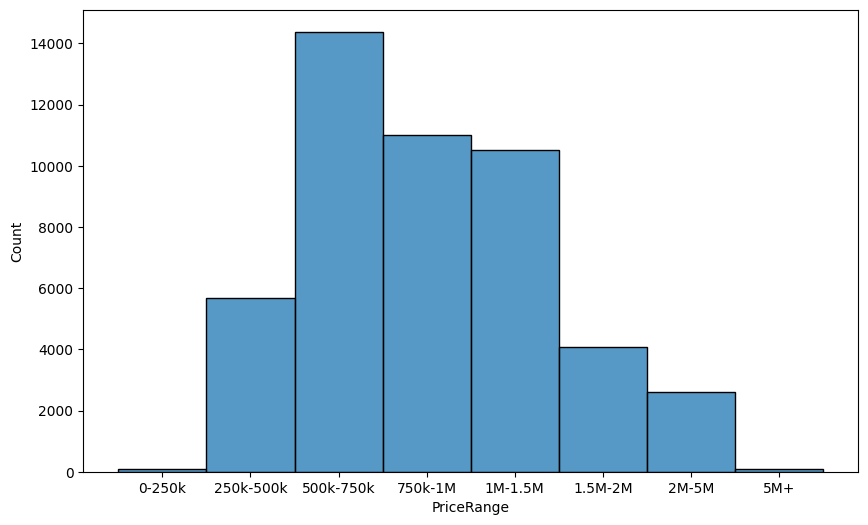

In [10]:
price_bins = [0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 5000000, 11500000]
price_labels = ['0-250k', '250k-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-5M', '5M+']

housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.histplot(x=housing['PriceRange'], palette='Set2')

In [11]:
# price_bins = [0, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 2000000, 5000000, 11500000]
# price_labels = ['0-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k', '750k-800k', '800k-850k', '850k-900k', '900k-950k', '950k-1M', '1M-1.1M', '1.1M-1.2M', '1.2M-1.3M', '1.3M-1.4M', '1.4M-1.5M', '1.5M-2M', '2M-5M', '5M+']

# housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
# plt.figure(figsize=(10, 6))
# sns.histplot(x=housing['PriceRange'], palette='Set2')

## Correlations

,Rooms,Price
Rooms,1.000000,0.412438
Price,0.412438,1.000000


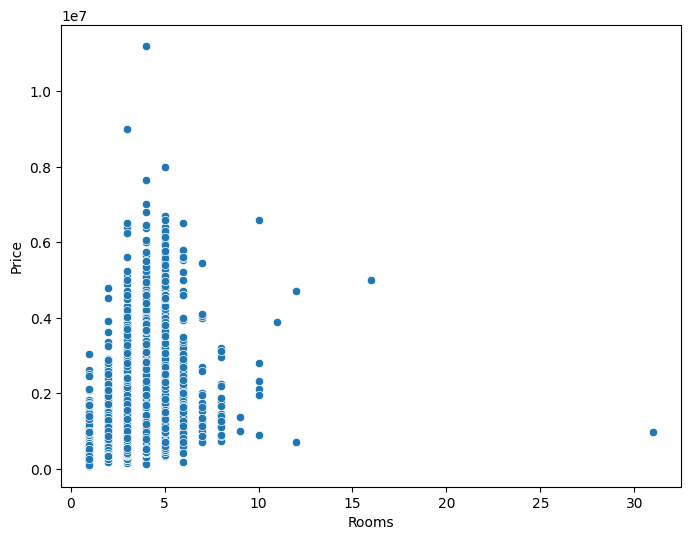

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='Rooms', y='Price')
housing[['Rooms', 'Price']].corr()

,Distance,Price
Distance,1.000000,-0.253668
Price,-0.253668,1.000000


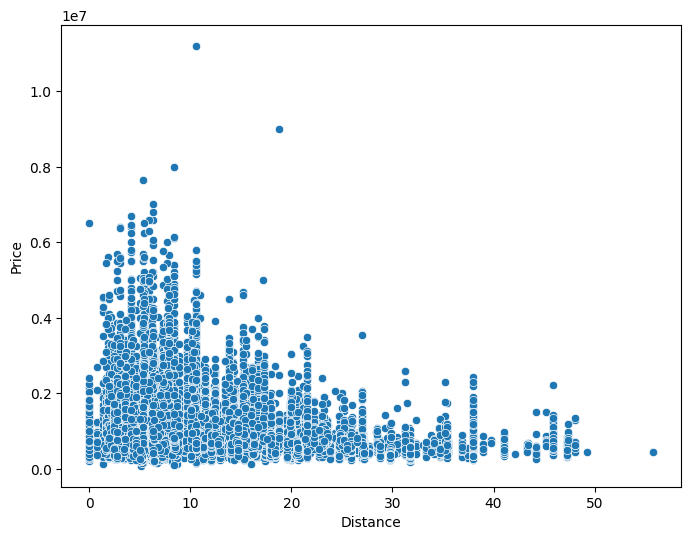

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='Distance', y='Price')
housing[['Distance', 'Price']].corr()

<Axes: xlabel='Regionname'>

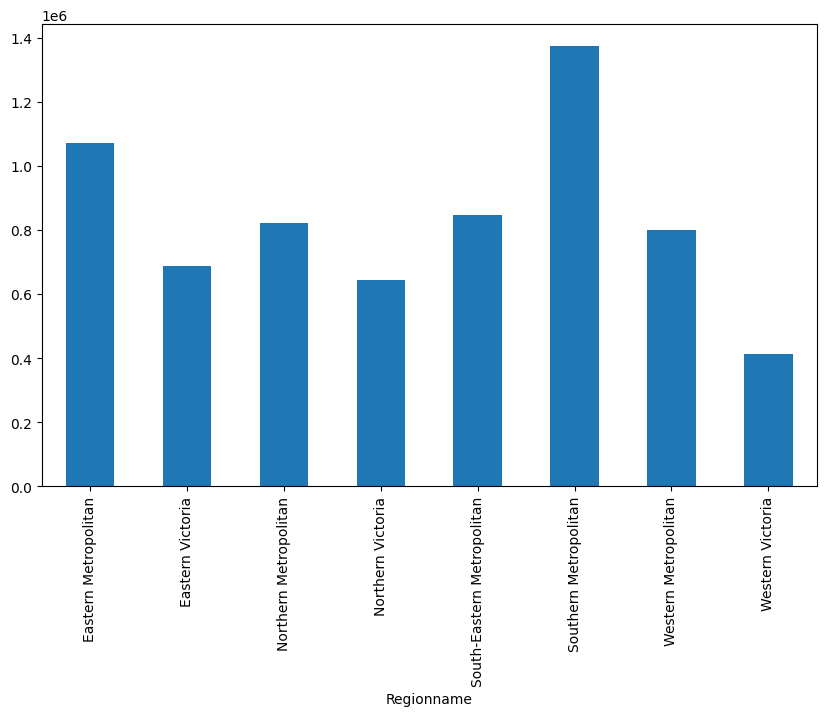

In [14]:
plt.figure(figsize=(10, 6))
housing.groupby('Regionname')['Price'].mean().plot(kind='bar')

In [31]:
mean_price_by_region = housing.groupby('Regionname')['Price'].mean().reset_index().sort_values(by='Price').reset_index(drop=True)
cheapest_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmin()]
most_expensive_region = mean_price_by_region.loc[mean_price_by_region['Price'].idxmax()]
print(cheapest_region)
most_expensive_region

Regionname    Western Victoria
Price            412026.098901
Name: 0, dtype: object


Regionname    Southern Metropolitan
Price                1373221.771297
Name: 7, dtype: object

<Axes: >

<Figure size 1000x600 with 0 Axes>

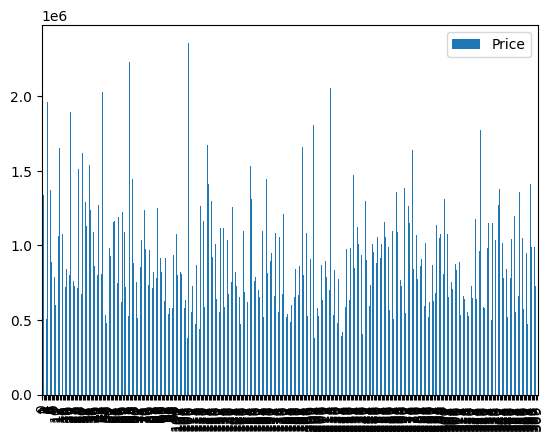

In [32]:
plt.figure(figsize=(10, 6))

mean_price_by_suburb = housing.groupby('Suburb')['Price'].mean().reset_index()
mean_price_by_suburb.plot(kind='bar')

In [33]:
cheapest_suburb = mean_price_by_suburb.loc[mean_price_by_suburb['Price'].idxmin()]
most_expensive_suburb = mean_price_by_suburb.loc[mean_price_by_suburb['Price'].idxmax()]
print(cheapest_suburb)
most_expensive_suburb

Suburb      Darley
Price     380000.0
Name: 108, dtype: object


Suburb          Deepdene
Price     2359805.555556
Name: 109, dtype: object

In [36]:
mean_price_by_region.rank()

,Regionname,Price
0,8.0,1.0
1,4.0,2.0
2,2.0,3.0
3,7.0,4.0
4,3.0,5.0
5,5.0,6.0
6,1.0,7.0
7,6.0,8.0


In [38]:
housing['Regionname_encoded'] = housing['Regionname']
housing['Regionname_encoded']
# housing[['Regionname', 'Regionname_encoded']].drop_duplicates().sort_values('Regionname_encoded')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
from sklearn.linear_model import LinearRegression

# X = housing[['Regionname', 'Distance']]  # has to be encoded
X = housing[['Regionname_encoded', 'Distance']]
# X = pd.get_dummies(housing[['Regionname', 'Distance']], drop_first=True)
y = housing['Price']
var_y = y.var()

reg_model = LinearRegression()
reg_model.fit(X, y)

coefficients = reg_model.coef_
intercept = reg_model.intercept_

r_squared = reg_model.score(X, y)

print(f'Intercept (Base Price): {intercept:,.2f} AUD')

print(f'''Coefficients:
- Regionname (encoded): {coefficients[0]:,.2f} AUD increase per unit increase in Regionname.
- Distance: {coefficients[1]:,.2f}''')

print(f'- Var: {var_y}')
print(f'- R-squared: {r_squared:.4f}')
print(f'- R-squared * Var: {var_y * r_squared}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Correlation summary: r-squared is 0.2 which means that Distance and Regionname contribute to just 20% of the price